In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
M = 300 # num agents
T = 10 # timesteps
R = 0.4 # confidence bound


x = np.random.rand(M) # init all agents to [0,1]
def get_A(x):
    X = np.array([x]*M)
    mask = abs(X - X.T) < R
    A = np.zeros(M)
    for i in range(M):
        A[i] = np.mean(x[mask[i]])
    return(A)

In [101]:
X = np.zeros((T,M))

X[0,:] = x

for t in range(T-1):
    X[t+1,:] = get_A(X[t,:])
X

array([[0.54619854, 0.35714888, 0.59544332, ..., 0.23309904, 0.62597704,
        0.68622533],
       [0.56517748, 0.41494852, 0.60667682, ..., 0.35448811, 0.61303614,
        0.63511721],
       [0.52100448, 0.52100448, 0.52100448, ..., 0.51527862, 0.52846687,
        0.53907552],
       ...,
       [0.52381915, 0.52381915, 0.52381915, ..., 0.52381915, 0.52381915,
        0.52381915],
       [0.52381915, 0.52381915, 0.52381915, ..., 0.52381915, 0.52381915,
        0.52381915],
       [0.52381915, 0.52381915, 0.52381915, ..., 0.52381915, 0.52381915,
        0.52381915]], shape=(10, 300))

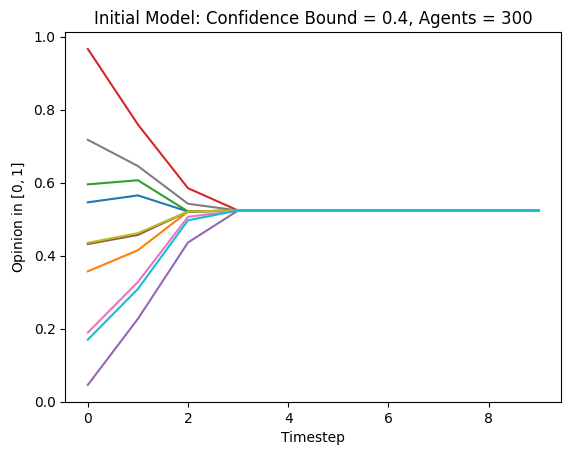

In [102]:
for i in range(T):
    plt.plot(X[:,i])
plt.title(f'Initial Model: Confidence Bound = {R}, Agents = {M}')
plt.xlabel('Timestep')
plt.ylabel('Opinion in $[0,1]$')
plt.show()
